# Days 4 & 5

Goals:
- Understand key concepts (15 min)
- Face detection (30 min)
- Face landmark detection (15 min)
- Opening and handling videos (EXTRA)
- [  ] Run tracking live demo (15 min)
- Create a face recognition (60 min)
- [  ] Run object detection and tracking live demo (15 min)
- Conclusions (15 min)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
# %matplotlib inline

In [88]:
# cd "C:\\Users\\student\\Desktop\\Vision"

## Face Detection

In [3]:
# Open your images
# Note: face detectors work in grayscale (*)
semilab = cv2.imread('semilab19.jpg',0) # choose any pic that has faces
mylab = cv2.imread('Pic.jpg',0) # put the name of the group pic

In [4]:
semilab

array([[63, 96, 89, ..., 38, 34, 43],
       [31, 79, 94, ..., 80, 52, 95],
       [40, 59, 87, ..., 83, 59, 47],
       ...,
       [32, 32, 33, ..., 39, 46, 50],
       [32, 32, 32, ..., 79, 33, 38],
       [32, 31, 31, ..., 45, 30, 73]], dtype=uint8)

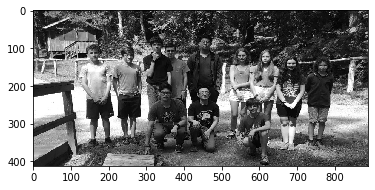

In [6]:
plt.imshow(semilab,cmap="gray")

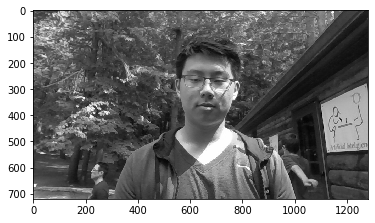

In [7]:
plt.imshow(mylab,cmap='gray')

In [11]:
# Define a classifier with given "cascades" (set of features, kernels)
face_cascade = cv2.CascadeClassifier('haarcascades//haarcascade_frontalface_default.xml')

In [12]:
# The following function takes an image as input, find all the faces and
#   draw rectangles around them.
def detect_face(img):
    # Copy matrix
    face_img = img.copy()
    
    # Built-in function for face detection
    face_rects = face_cascade.detectMultiScale(face_img) 
    # You could change the default parameters...
    #face_rects = face_cascade.detectMultiScale(face_img,scaleFactor=1.2, minNeighbors=5)
    
    # Draw faces  (previous function returns the rectangle coordinate)
    for (x,y,w,h) in face_rects: 
        cv2.rectangle(face_img, (x,y), (x+w,y+h), (255,255,255), 5) 
        
    return face_img

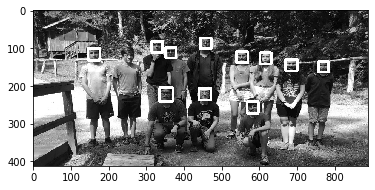

In [13]:
# Run the face detection
res = detect_face(semilab)
plt.imshow(res,cmap='gray')

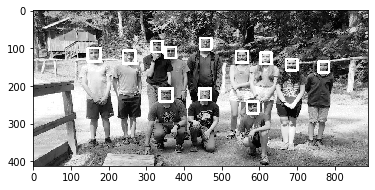

In [14]:
# Try running the same algorithm after equalizing the image
res = detect_face(cv2.equalizeHist(semilab))
plt.imshow(res,cmap='gray')

## Eye Detection with Haar-like cascades

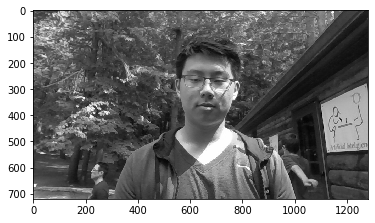

In [28]:
# Load a face image
face = cv2.imread('Pic.jpg',0)
plt.imshow(face,cmap='gray')

In [16]:
# Define the eye detector
eye_cascade = cv2.CascadeClassifier('haarcascades//haarcascade_eye.xml')

In [17]:
# Define the eye detector function
def detect_eyes(img):
    # Copy image
    face_img = img.copy()
    # Detect all the eyes (return the rectangles)
    eyes = eye_cascade.detectMultiScale(face_img) 
    # Draw the boxes
    for (x,y,w,h) in eyes: 
        cv2.rectangle(face_img, (x,y), (x+w,y+h), (255,255,255), 2) 
    return face_img

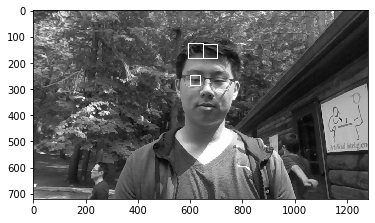

In [19]:
# Run detector after equalizing the image
#res = detect_eyes(cv2.equalizeHist(face))
res = detect_eyes(face)
plt.imshow(res,cmap='gray')

## Using the webcam

In [20]:
import cv2

# Connects to your computer's default camera
cap = cv2.VideoCapture(0) # 0 is for default camera

# Automatically grab width and height from video feed
# (returns float which we need to convert to integer for later on!)
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

# Keep in the loop until you press "q"
while True:
    
    # Capture frame-by-frame
    ret, frame = cap.read()
    
    if ret: # ret is True when frame is captured
        # Convert color image to grayscale
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

        # Display the resulting frame
        cv2.imshow('frame',gray)

        # This command let's us quit with the "q" button on a keyboard.
        # Simply pressing X on the window won't work!
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
    else:
        print('- Webcam not found...')
        break

# When everything done, release the capture and destroy the windows
cap.release()
cv2.destroyAllWindows()

## (EXTRA) Writing to video

In [ ]:
import cv2

cap = cv2.VideoCapture(0)

# Automatically grab width and height from video feed
# (returns float which we need to convert to integer for later on!)
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))


# MACOS AND LINUX: *'XVID' (MacOS users may want to try VIDX as well just in case)
# WINDOWS *'VIDX'
writer = cv2.VideoWriter('testvideo.mp4', cv2.VideoWriter_fourcc(*'XVID'),25, (width, height))

## This loop keeps recording until you hit Q or escape the window
## You may want to instead use some sort of timer, like from time import sleep and then just record for 5 seconds.

while True:
    # Capture frame-by-frame
    ret, frame = cap.read()

    
    # Write the video
    writer.write(frame)

    # Display the resulting frame
    cv2.imshow('frame',frame)
    
    # This command let's us quit with the "q" button on a keyboard.
    # Simply pressing X on the window won't work!
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

        
cap.release()
writer.release()
cv2.destroyAllWindows()

## (EXTRA) Opening and showing video files

In [ ]:
import cv2
import time
# Same command function as streaming, its just now we pass in the file path, nice!
cap = cv2.VideoCapture('filename.mp4') 


# Always a good idea to check if the video was acutally there
# If you get an error at thsi step, triple check your file path!!
if cap.isOpened()== False: 
    print("Error opening the video file. Please double check your file path for typos. Or move the movie file to the same location as this script/notebook")
    

# While the video is opened
while cap.isOpened():
    
    # Read the video file.
    ret, frame = cap.read()
    
    # If we got frames, show them.
    if ret == True:
        # Display the frame at same frame rate of recording
        # Watch lecture video for full explanation
        
        # FRAMES PER SECOND FOR VIDEO
        #fps = 25
        #time.sleep(1/fps) ## TO WATCH IN A MORE REAL TIME!
        
        cv2.imshow('frame',frame)
 
        # Press q to quit
        if cv2.waitKey(1) & 0xFF == ord('q'):
            
            break
 
    # Or automatically break this whole loop if the video is over.
    else:
        break
        
cap.release()
# Closes all the frames
cv2.destroyAllWindows()

## EXERCISE: Write a script to detect faces from the webcam

In [21]:
cap = cv2.VideoCapture(0) 

while True: 
    
    ret, frame = cap.read(0) 
     
    frame = detect_face(frame)
 
    cv2.imshow('Video Face Detection', frame) 
 
    c = cv2.waitKey(1) 
    if c == 27: 
        break 
        
cap.release() 
cv2.destroyAllWindows()

## Get Facial Landmarks from Webcam

In [73]:
def shape_to_np(shape):
    v = []
    for pt in shape.parts():
        v.append([pt.x, pt.y])
    return np.array(v)

In [75]:
#from imutils import face_utils
import dlib # Package used for the face landmark detection
import cv2
 
# let's code a face detector(HOG) and after detect the 
# landmarks on this detected face

# p = our pre-treined model directory, on my case, it's on the same script's diretory.
p = "shape_predictor_68_face_landmarks.dat"
# Use the face detector from dlib
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor(p)

cap = cv2.VideoCapture(0)
 
try:
    while True:
        # Getting out image by webcam 
        _, image = cap.read()
        # Converting the image to gray scale
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

        # Get faces into webcam's image
        rects = detector(gray, 0)

        # For each detected face, find the landmark.
        for (i, rect) in enumerate(rects):
            # Make the prediction and transfom it to numpy array
            shape = predictor(gray, rect)
            #shape = face_utils.shape_to_np(shape)
            shape = shape_to_np(shape)

            # Draw on our image, all the finded cordinate points (x,y) 
            for (x, y) in shape:
                cv2.circle(image, (x, y), 2, (0, 255, 0), -1)

        # Show the image
        cv2.imshow("Output", image)

        k = cv2.waitKey(5) & 0xFF # press ESC to exit
        if k == 27:
            break
except:
    print('Some problem...')

cv2.destroyAllWindows()
cap.release()

# Day 5

- Create a face recognition (60 min)
    - Define a function to compute the Euclidean distance between points
    - Define your metrics from the face landmarks
    - Write a function that computes the face metrics given a face image
    - Training: write a function that read images from the webcam, computes the facemetrics and store them in a database
    - Write a function that given a face image and a database, returns the average distance of the k-closest face metrics (kNN)
    - Write a function that reads the webcam, get the face image and returns how close it is from the database.
- [ ] Run object detection and tracking live demo (15 min)
- Conclusions (15 min)

In [1]:
def shape_to_np(shape):
    v = []
    for pt in shape.parts():
        v.append([pt.x, pt.y])
    return np.array(v)

## Define Face Metric and Helpers

In [2]:
import matplotlib.pyplot as plt
#from imutils import face_utils
import dlib
import cv2
%matplotlib inline

import numpy as np

# Compute the euclidean distance between 2 points
def edist(xy1,xy2):
    return np.sqrt((xy1[0]-xy2[0])*(xy1[0]-xy2[0])+(xy1[1]-xy2[1])*(xy1[1]-xy2[1]))


# Compute the Euclidean distance between two points (N-dimensional)
def edistNdim(xy1,xy2):
    s = 0
    xy1 = np.array(xy1)
    xy2 = np.array(xy2)
    for i in range(len(xy1)):
        s += (xy1[i]-xy2[i])*(xy1[i]-xy2[i])
    return np.sqrt(s)

# Given a set of points (xyset), 
# compute the average distance of a point xy to this set 
def edist2set(xy,xyset):
    dist = []
    for i in range(len(xyset)):
        #print('- Point:',i)
        dist.append(edistNdim(xy,xyset[i]))
    return np.mean(dist)

# Get the average distance of the k-closest points from xyset
def knn_dist(xy,xyset,k):
    dist = []
    for i in range(len(xyset)):
        #print('- Point:',i)
        dist.append(edistNdim(xy,xyset[i]))
    
    return np.mean(np.sort(dist)[:k])

# Get the middle point
def mpoint(xy1,xy2):
    return (xy1[0]+xy2[0])/2,(xy1[1]+xy2[1])/2

# Define a set of face metrics that you think it might be useful 
def get_face_metric2(shape):
    face_dist = []
    # key positions
    eyeL = mpoint(shape[36],shape[39])
    eyeR = mpoint(shape[42],shape[45])
    eyeCenter = mpoint(eyeL,eyeR)
    lip = mpoint(shape[62],shape[66])
    eyebrow = mpoint(shape[19],shape[24])
    facebase = mpoint(shape[4],shape[12])
    # normalization factor
    face_width = edist(shape[0],shape[16])
    faceb_width = edist(shape[4],shape[12])
    lip_width = edist(shape[48],shape[54])
    # Distances
    nose_width = edist(shape[31],shape[35])
    nose_hight = edist(shape[27],shape[33])
    humor_dist = (facebase[1]-lip[1])/lip_width
    
    e2chin_dist = edist(eyeCenter,shape[8])/face_width
    e2e_dist = edist(eyeL,eyeR)/face_width
    e2nose = edist(eyeCenter,shape[33])/face_width
    eyebrow_dist = edist(shape[19],shape[24])/face_width
    e2lip = edist(eyeCenter,lip)/face_width
    noseratio = nose_width / nose_hight
    faceBratio = faceb_width/ face_width
    faceCratio = edist(eyebrow,shape[8])/face_width
    
    eL2nose = edist(eyeL,shape[33])/face_width
    eR2nose = edist(eyeR,shape[33])/face_width
    lipL2nose = edist(shape[48],shape[33])/face_width
    lipR2nose = edist(shape[54],shape[33])/face_width
    
    face_dist.append(e2chin_dist)
    face_dist.append(noseratio)
    face_dist.append(faceBratio)
    face_dist.append(faceCratio)
    face_dist.append(humor_dist)

    face_dist.append(e2e_dist)
    face_dist.append(e2nose)
    #face_dist.append(eyebrow_dist)
    face_dist.append(e2lip)
    
    face_dist.append(eL2nose)
    face_dist.append(eR2nose)
    face_dist.append(lipL2nose)
    face_dist.append(lipR2nose)
    
    return face_dist


In [3]:
# Compute the euclidean distance between 2 points
edist([0,0],[3,4])

5.0

In [4]:
# Euclidean distance in N-dim
edistNdim([3,4,np.sqrt(11)],[0,0,0])

6.0

In [5]:
# Distance to a set of points
edist2set([3,4], [[3,1],[1,2],[0,0]])

3.60947570824873

In [6]:
# Average of the k-Nearest Neighbors (kNN)
knn_dist([3,4], [[3,1],[1,2],[0,0]],k=3)

3.60947570824873

In [7]:
# If we add a distant point, it will not matter... (TRY TO ADD A CLOSE POINT)
knn_dist([3,4], [[3,1],[1,2],[0,0],[99,99]],k=3)

3.60947570824873

In [8]:
# Middle point
mpoint([1,1],[1,5])

(1.0, 3.0)

## Function to collect face images from Webcam (0) or a movie file and return the set of face metrics

In [9]:
#from imutils import face_utils
import dlib
import cv2
import time
 

def movie2facemetrics(clipname): # "0" will lead to the webcam!!
    # Timer
    tic = time.time()
    # Store all landmarks
    alllandmarks = []
    
    # Define the face detectors
    # p = our pre-treined model directory, on my case, it's on the same script's diretory.
    p = "shape_predictor_68_face_landmarks.dat"
    detector = dlib.get_frontal_face_detector()
    predictor = dlib.shape_predictor(p)

    cap = cv2.VideoCapture(clipname)

    while True:
        # Getting out image by webcam 
        ret, image = cap.read()
        
        if ret:
            # Converting the image to gray scale
            gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

            # Get faces into webcam's image
            rects = detector(gray, 0)

            # For each detected face, find the landmark.
            for (i, rect) in enumerate(rects):
                # Make the prediction and transfom it to numpy array
                shape = predictor(gray, rect)
                #shape = face_utils.shape_to_np(shape)
                shape = shape_to_np(shape)
                # Metrics
                landmarks = get_face_metric2(shape)
                # Draw on our image, all the finded cordinate points (x,y) 
                for i,(x, y) in enumerate(shape):
                    if i in [0,8,16,36,39,42,45,30,48,54, 4,12,19,24]:             
                        cv2.putText(image,"%i"%(i+1), (x,y), cv2.FONT_HERSHEY_SIMPLEX, 0.35, 255)
                    #else:
                    #    cv2.circle(image, (x, y), 2, (0, 255, 0), -1)
                (x,y) = shape[8]
                font = cv2.FONT_HERSHEY_SIMPLEX
                cv2.putText(image,'%.2f,%.2f,%.2f,%.2f,%.2f'%(landmarks[0],landmarks[1],landmarks[2],landmarks[3],landmarks[4]),(x-150,y+20), font, 1, (200,0,0), 3, cv2.LINE_AA)
                #print(landmarks)
                #variable = input('(PRESS any key to continue...)')

                # Time
                cv2.putText(image,"%d sec"%(time.time()-tic), (10,30),font,1, 255,3)

                # Absolute face size approx
                absE2chin = edist(shape[26],shape[8])
                # Draw rectangle if close
                if absE2chin > 180.0:
                    LeftUp = (shape[0][0],shape[19][1]-10)
                    RightDown = (shape[16][0],shape[8][1])
                    cv2.rectangle(image,pt1=LeftUp,pt2=RightDown,color=(0,255,0),thickness=2)
                    # Store landmarks if close enough
                    alllandmarks.append(landmarks)

            # Show the image
            cv2.imshow("Output", image)

            k = cv2.waitKey(5) & 0xFF
            if k == 27:
                break
        else:
            break

    cv2.destroyAllWindows()
    cap.release()
    
    return alllandmarks

## Training the face detector (collect face metrics): camper 1

In [43]:
# Save a dictionary into a pickle file.
import pickle

allland_camper1 = movie2facemetrics(0)
# Save the landmarks just in case the notebook crashes...
pickle.dump(allland_camper1, open( "allland_camper1.p", "wb" ) )

## Training the face detector (collect face metrics): camper 2

In [99]:
allland_camper2 = movie2facemetrics(0)
# Save the landmarks just in case the notebook crashes...

pickle.dump(allland_camper2, open( "allland_camper2.p", "wb" ) )

## Face Recognition using "Trained" (collected) Landmarks + kNN

In [10]:
#from imutils import face_utils
from collections import deque
import dlib
import cv2
import time
import os
 
# let's code an faces detector(HOG) and after detect the 
# landmarks on this detected face

def recognize_face(clipname,allland1,label1,allland2,label2):
    alllandmarks = []
    
    # p = our pre-treined model directory, on my case, it's on the same script's diretory.
    p = "shape_predictor_68_face_landmarks.dat"
    detector = dlib.get_frontal_face_detector()
    predictor = dlib.shape_predictor(p)

    cap = cv2.VideoCapture(clipname)

    iframe = 0
    urdist1 = deque(maxlen=40)
    urdist2 = deque(maxlen=40)
    mytext = ''
    absE2chin = 0
    tic = time.time()
    while True:
        iframe+=1
        # Getting out image by webcam 
        _, image = cap.read()
        # Converting the image to gray scale
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

        # Get faces into webcam's image
        rects = detector(gray, 0)

        # For each detected face, find the landmark.
        for (i, rect) in enumerate(rects):
            
            # Make the prediction and transfom it to numpy array
            shape = predictor(gray, rect)
            #shape = face_utils.shape_to_np(shape)
            shape = shape_to_np(shape)
            # Metrics
            landmarks = get_face_metric2(shape)
            
            # Draw on our image, all the finded cordinate points (x,y) 
            #for i,(x, y) in enumerate(shape):
                #if i in [0,8,16,36,39,42,45,30,48,54, 4,12,19,24]:             
                #    cv2.putText(image,"%i"%(i+1), (x,y), cv2.FONT_HERSHEY_SIMPLEX, 0.35, 255)
                
            # Distance to allland
            urdistA = knn_dist(landmarks,allland1,5)
            urdistB = knn_dist(landmarks,allland2,5)
            urdist1.append(urdistA) # moving window of size 10
            urdist2.append(urdistB)
    
            aux = np.random.rand()
            # Absolute face size approx
            absE2chin = edist(shape[26],shape[8])
            # Draw rectangle if close
            if absE2chin > 180.0:
                    LeftUp = (shape[0][0],shape[19][1]-10)
                    RightDown = (shape[16][0],shape[8][1])
                    cv2.rectangle(image,pt1=LeftUp,pt2=RightDown,color=(0,255,0),thickness=2)
            # Recognize every 3 sec
            if (time.time()-tic)>2:
                if absE2chin > 180.0:
                    dist1 = np.array(urdist1).mean()
                    dist2 = np.array(urdist2).mean()
                    if (dist1 < 0.1) & (dist1<dist2):
                        tic = time.time()
                        mytext = label1
                        #os.system("camper.mp3")
                        #time.sleep(5)
                    elif (dist2 < 0.1) & (dist2<dist1):
                        tic = time.time()
                        mytext = label2
                    elif aux <0.5:
                        tic = time.time()
                        mytext = 'Camper!'
                    else:
                        tic = time.time()
                        mytext = '???'
                else:
                    tic = time.time()
                    mytext = 'too far...'
            
            # Get coordinate to write text
            (x,y) = shape[8]
            font = cv2.FONT_HERSHEY_SIMPLEX
            cv2.putText(image,'1: %.2f, 2: %.2f'%(urdistA,urdistB),(x-50,y+50), font, 0.7, (0,200,0), 2, cv2.LINE_AA)
            cv2.putText(image,'%s'%mytext,(x-20,y+20), font, 1, (0,200,0), 3, cv2.LINE_AA)
            
            # Time
            cv2.putText(image,"%d sec"%(time.time()-tic), (10,30),font,0.7, (0,200,0),2)
            cv2.putText(image,"%.2f"%(absE2chin), (10,60),font,0.7, (0,200,0),2)
            
            # Store landmarks
            alllandmarks.append(landmarks)

        # Show the image
        cv2.imshow("Output", image)

        k = cv2.waitKey(5) & 0xFF
        if k == 27:
            break

    cv2.destroyAllWindows()
    cap.release()
    
    return alllandmarks

## Load pre-trained landmarks

In [12]:
import pickle

allland_camper1 = pickle.load( open( "allland_jaime.p", "rb" ) )
allland_camper2 = pickle.load( open( "allland_andrey.p", "rb" ) )

## Test

In [13]:
_ = recognize_face(0,allland_camper1,'Jaime',allland_camper2,'Andrey')

## (EXTRA) Converting text to speech (mp3)
Combine with your face recognition function!

In [123]:
# Import the required module for text 
# to speech conversion 
from gtts import gTTS 

# This module is imported so that we can 
# play the converted audio 
import os 

# The text that you want to convert to audio 
mytext = 'Hey, Camper! How did you like Sigma Camp so far?' # [ ] UPDATE
language = 'en'
#language = 'fr'

label = "camper" # UPDATE [ ]

# Passing the text and language to the engine, 
# here we have marked slow=False. Which tells 
# the module that the converted audio should 
# have a high speed 
myobj = gTTS(text=mytext, lang=language, slow=False) 

# Saving
myobj.save("%s.mp3"%label)

# Playing the converted file 
os.system("%s.mp3"%label)

0